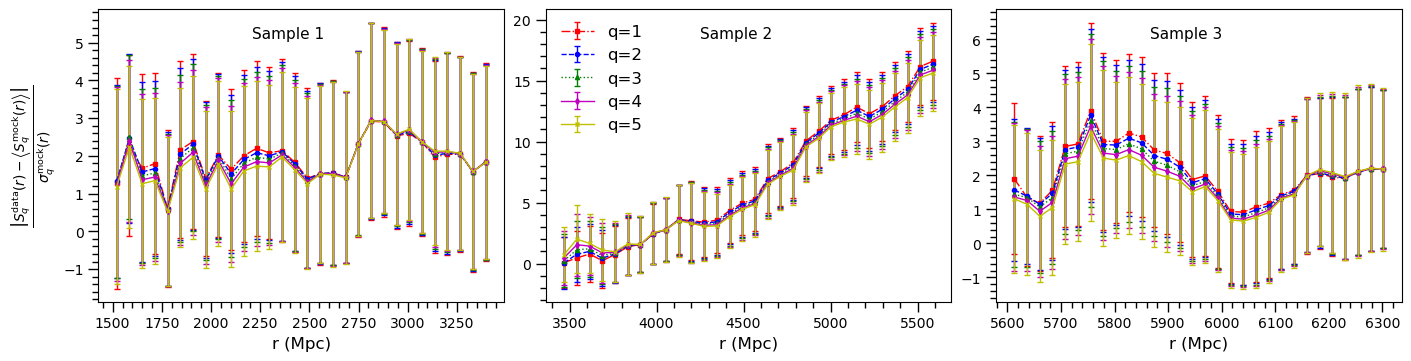

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator
import os
output_dir = "../../../results/supplementary_plots"
os.makedirs(output_dir, exist_ok=True)

# Disable LaTeX rendering (use default mathtext instead)
# plt.rcParams['text.usetex'] = False   #<-- Removed

fig, axes = plt.subplots(1, 3, figsize=(14, 3.5), constrained_layout=True)

for i in range(3):  
    f_name1 = f'inter_data1/sample{i+1}_entr_err.csv'
    df1 = pd.read_csv(f_name1)
    R = df1['r'].to_numpy()
    s1 = df1['a1'].to_numpy()
    s2 = df1['a2'].to_numpy()
    s3 = df1['a3'].to_numpy()
    s4 = df1['a4'].to_numpy()
    s5 = df1['a5'].to_numpy()
    d_s1 = df1['std_a1'].to_numpy()
    d_s2 = df1['std_a2'].to_numpy()
    d_s3 = df1['std_a3'].to_numpy()
    d_s4 = df1['std_a4'].to_numpy()
    d_s5 = df1['std_a5'].to_numpy()


    f_name2 = f'inter_data2/sample_rand_{i+1}_entropy.csv'
    df2 = pd.read_csv(f_name2)
    
    R_rand = df2['r'].to_numpy()
    s1_rand = df2['mean_a1'].to_numpy()
    s2_rand = df2['mean_a2'].to_numpy()
    s3_rand = df2['mean_a3'].to_numpy()
    s4_rand = df2['mean_a4'].to_numpy()
    s5_rand = df2['mean_a5'].to_numpy()
    d_s1_rand = df2['std_a1'].to_numpy()
    d_s2_rand = df2['std_a2'].to_numpy()
    d_s3_rand = df2['std_a3'].to_numpy()
    d_s4_rand = df2['std_a4'].to_numpy()
    d_s5_rand = df2['std_a5'].to_numpy()


    s1_cri = abs(s1 - s1_rand) / d_s1_rand
    d_s1_cri = np.sqrt(d_s1**2 + d_s1_rand**2) / d_s1_rand

    s2_cri = abs(s2 - s2_rand) / d_s2_rand
    d_s2_cri = np.sqrt(d_s2**2 + d_s2_rand**2) / d_s2_rand

    s3_cri = abs(s3 - s3_rand) / d_s3_rand
    d_s3_cri = np.sqrt(d_s3**2 + d_s3_rand**2) / d_s3_rand

    s4_cri = abs(s4 - s4_rand) / d_s4_rand
    d_s4_cri = np.sqrt(d_s4**2 + d_s4_rand**2) / d_s4_rand

    s5_cri = abs(s5 - s5_rand) / d_s5_rand
    d_s5_cri = np.sqrt(d_s5**2 + d_s5_rand**2) / d_s5_rand

    ax = axes[i]
    
    ax.set_xlabel("r (Mpc)", fontsize=12)
   
    ax.errorbar(R, s1_cri, yerr=d_s1_cri, ls='-.', lw=1, marker='s', markersize=3,
            c='r', ecolor='r', elinewidth=1, capsize=2, label='q=1')

    ax.errorbar(R, s2_cri, yerr=d_s2_cri, ls='--', lw=1, marker='o', markersize=3,
            c='b', ecolor='b', elinewidth=1, capsize=2, label='q=2')

    ax.errorbar(R, s3_cri, yerr=d_s3_cri, ls=':', lw=1, marker='^', markersize=3,
            c='g', ecolor='g', elinewidth=1, capsize=2, label='q=3')

    ax.errorbar(R, s4_cri, yerr=d_s4_cri, ls='-', lw=1, marker='d', markersize=3,
            c='m', ecolor='m', elinewidth=1, capsize=2, label='q=4')

    ax.errorbar(R, s5_cri, yerr=d_s5_cri, ls='-', lw=1, marker='x', markersize=3,
            c='y', ecolor='y', elinewidth=1, capsize=2, label='q=5')

    if(i==0):
        # ax.set_ylabel(r"$\psi(r)$", fontsize=14)
       ax.set_ylabel(
    r"$\frac{\left| S^{\mathrm{data}}_q(r) - \left\langle S^{\mathrm{mock}}_{q}(r) \right\rangle \right|}"
    r"{\sigma^{\mathrm{mock}}_{q}(r)}$",
    fontsize=14)

    if(i==1):
        ax.legend(fontsize=12, frameon = False)

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='both', width=1, labelsize=10)
    ax.tick_params(which='major', length=7)
    ax.tick_params(which='minor', length=4, color='k')
    ax.text(0.38, 0.90, f"Sample {i+1}", transform=ax.transAxes, fontsize=11)

# Save and show the complete figure
# plt.savefig("entropy_enq.pdf", dpi = 300 ,bbox_inches='tight')
plt.savefig("../../../results/supplementary_plots/suppl_fig11.pdf", bbox_inches='tight')

plt.show()

In [ ]:
import shutil
shutil.rmtree('inter_data1')
shutil.rmtree('inter_data2')     